<a href="https://colab.research.google.com/github/shahdhruv29/Computational-Shape-Modelling/blob/main/Lab2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
## IT575: Computational Shape Modeling (Autumn 2024-25)
### Assignment 2: Procrustes Shape Analysis
#### Student 1 Name: $\underline{\hspace{1in}}$                 Student 1 ID: $\underline{\hspace{1in}}$
#### Student 1 Name: $\underline{\hspace{1in}}$                   Student 2 ID: $\underline{\hspace{1in}}$
***

In [1]:
# import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import math

### Q.1. We will study the shape space of rectangles to begin with. Complete the code below to generate a collection of random rectangles - centered at randomly chosen points, in random orientations, and in random aspect ratios.

In [41]:
# x = np.array([-0.5, 0.5, 0.5, -0.5])
# y = np.array([-0.5, -0.5, 0.5, 0.5])
# theta = 2*np.pi * np.random.rand(5)
# aspect = np.abs(1 + (20*(np.random.rand(5)-0.5)))
# txtemp = 10*(np.random.rand(5,1) - 0.5)
# tytemp = 10*(np.random.rand(5,1) - 0.5)
# tx = txtemp @ np.ones((1,4))
# ty = tytemp @ np.ones((1,4))
# print(tx.shape, ty.shape)


# x = np.tile(x,(5,1))
# y = np.tile(y,(5,1))

# for i in np.arange(5):
#     x[i] = x[i] * aspect[i]
#     y[i] = y[i] * aspect[i]
#     rot = np.array([[np.cos(theta[i]), -np.sin(theta[i])], [np.sin(theta[i]), np.cos(theta[i])]])
#     cord = np.row_stack((x[i], y[i]))
#     cord = rot @ cord
#     # print(cord.shape)
#     x[i] = cord[0,:]
#     y[i] = cord[1,:]
#     print((x[i].reshape(-1,1)).shape)
#     x[i] = x[i] - tx[i,:].T
#     y[i] = y[i] - ty[i,:].T
#     print(x[i])
    # print(y[i])
# print(x
# print(aspect)
# print(x[1])
# print(x[1] * aspect[1])

(5, 4) (5, 4)
(4, 1)
[ 2.87551321 -3.83999551 -4.4848087   2.23070002]
(4, 1)
[-9.34533687 -0.29534792 -0.05916108 -9.10915002]
(4, 1)
[ 0.03173891 -0.64456259 -7.67827002 -7.00196852]
(4, 1)
[-0.19443831  0.52626767 -0.53988761 -1.26059358]
(4, 1)
[-2.80130284 -9.7408441  -6.4049632   0.53457806]


In [2]:
#############################################
# Random Rectangle Generation
# myRectangle(n) generates 'n' rectangles in 2D with random aspect ratios, orientations and locations.
# It returns two nx4 arrays, each containing x and y coordinates respectively of the 4 vertices (in each row)
# of the 'n' rectangles.
#############################################
def myRectangle(n):
    aspect = np.abs(1 + (20*(np.random.rand(n)-0.5))) # Aspect ratio distribution: |1+ U([-10,10])|
    theta = 2*np.pi * np.random.rand(n)             # Orientation angle dist: U([0,2 pi])
    txtemp = 10*(np.random.rand(n,1) - 0.5)           # x component of translation vector, dist: U([-5,5])
    tytemp = 10*(np.random.rand(n,1) - 0.5)           # y component of translation vector, dist: U([-5,5])
    tx = txtemp @ np.ones((1,4))    # This is required for translating all 4 vertices with the same vector
    ty = tytemp @ np.ones((1,4))    # This is required for translating all 4 vertices with the same vector

    #Initialize all n rectangles as the square: (-0.5,-0.5), (0.5,-0.5),(0.5,0.5),(-0.5,0.5)
    x = np.array([-0.5, 0.5, 0.5, -0.5])
    y = np.array([-0.5, -0.5, 0.5, 0.5])
    x = np.tile(x,(n,1))
    y = np.tile(y,(n,1))
    #------------------------------

    for i in np.arange(n): # For each random rectangle,do the following:

        # Change the aspect ratio using randomly generated "aspect" below

        x[i] = x[i] * aspect[i]
        y[i] = y[i] * aspect[i]

        ########################################################
        # Convert randomly generated angle to Rotation matrix.
        rot = np.array([[np.cos(theta[i]), -np.sin(theta[i])], [np.sin(theta[i]), np.cos(theta[i])]])
        #-----Apply ith rotation matrix to ith rectangle below
        cord = np.row_stack((x[i], y[i]))
        cord = rot @ cord
        x[i] = cord[0,:]
        y[i] = cord[1,:]
        ########################################################
        #------Translate the rotated rectangle using (tx,ty) below
        x[i] = x[i] - tx[i,:].T
        y[i] = y[i] - ty[i,:].T

        ########################################################

    return x,y

### The code below can be used to plot closed and open landmark representations of 2d objects

In [3]:
#################################################################
# Plots collection of 2D shapes
# Input: x,y - x and y coordinate matrices. Expected size n x m, where n is the number of shapes,
#              m is the number of points in each shape
#          t - t=0 plots closed curves by appending first point to the end. Any other value of t plots only
#              the given points.
#          c - Plotting parameters: "." will plot only the given vertices without joining them,
#              "-" will join the points with line segments. Color alphabets can also be provided, i.e.
#              "k-" will plot the points in black and will join them with black line segments.
# Output: None
# Usage: myplot2dshapes(x,y,0,"b.")
#################################################################
def myplot2dshapes(x,y,t,c):
    xs = x.shape
    n = xs[0]
    x1 = x
    y1 = y
    #  fig1, ax = plt.subplots()
    #ax.set_box_aspect(1)


    if t==0:
        if len(xs)<2:
            x1 = np.append(x,x[0])
            y1 = np.append(y,y[0])
            plt.plot(x1,y1)
            plt.axis('square')

        else:
            x1 = np.c_[x1, x1[:,0]]
            y1 = np.c_[y1, y1[:,0]]
            for i in np.arange(n):
                plt.plot(x1[i,:],y1[i,:],c)
                plt.axis('square')

    else:
        if len(xs)<2:
            plt.plot(x1,y1,c)
            plt.axis('square')

        else:
            for i in np.arange(n):
                plt.plot(x1[i,:],y1[i,:],c)
                plt.axis('square')
    plt.grid()

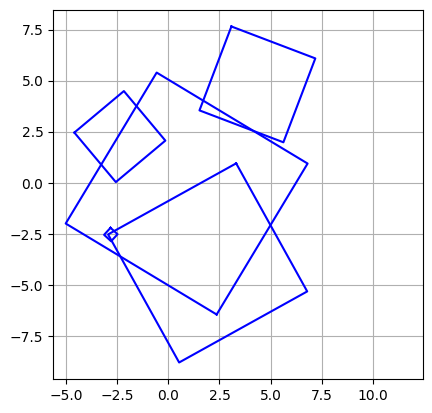

In [4]:
x, y = myRectangle(5)
myplot2dshapes(x,y,0,"b-")

### Q.2. Complete the code below to align a given collection of shapes to another given shape.
#### Align all shapes so that their centroids lie on origin and all shapes are unit-sized.

In [ ]:
#############################################
# Procrustes Alignment of collection of shapes (x,y) to a given shape (x0,y0)
# Input: x0, y0 - Expected Shape 1 x m, where m is the number of points in the shape
#        x, y - Collection of shapes to be aligned with x0,y0. x.shape = (n,m), y.shape = (n,m),
#               where n is the number of the shapes to be aligned with (x0,y0)
# Output: xtso,ytso - Shapes aligned with (x0,y0) with centroids of all of them at origin.
#                     xtso.shape = (n,m), ytso.shape(n,m).
#                     xtso contains x coordinates, while ytso contains y coordinates.
#############################################
def myProcrustes(x0,y0,x,y):
    n = np.shape(x)[0] # Number of shapes
    m = np.shape(x)[1] # Number of points in each shape

    #---Translate x0,y0 so that its centroid aligns with origin.
    x0 = x0 - (np.mean(x0, axis=0) * np.ones((1,m)))
    y0 = y0 - (np.mean(y0, axis=0) * np.ones((1,m)))

    #---- Scale x0,y0 to unit size
    s0 = (((x0**2) + (y0**2))@ np.ones((m,1)))**(-0.5)
    x0 = s0*x0
    y0 = s0*y0

    #---Translate x,y so that its centroid aligns with origin. Write your code below
    #--- Denote the mean aligned shape collection coordinates by xt,yt


    ##############################################################
    #-------Scale x,y individually to unit size---. Write your code below
    #--- Denote the unit-sized shape collection coordinates by xts,yts



    ##############################################################
    #----- Change the orientation of individual shape in x,y in order to align with the orientation of x0,y0
    theta = np.zeros(n) # Angle by which to rotate each shape in x,y. Initialized as 0.
    xtso = xts # Final aligned shape's x coordinate initialized as xts
    ytso = yts # Final aligned shape's y coordinate initialized as yts

    for i in np.arange(n): # For each of the shape
        # Estimate the angle of rotation
        theta[i] =

        ################################
        rot = np.array([[np.cos(theta[i]), -np.sin(theta[i])], [np.sin(theta[i]), np.cos(theta[i])]])
        tloc = np.array([xts[i,:],yts[i,:]])
        temp = rot @ tloc
        xtso[i,:] = temp[0,:]
        ytso[i,:] = temp[1,:]


    return xtso,ytso

### Q.3. Complete the following code to compute the mean shape from a collection of given shapes.

#### You may either use the algorithm described in class, or follow the iterative process below:
#### 1. Initialize the mean shape by randomly choosing a shape from the given collection
#### 2. Align all ORIGINAL shapes to the current estimate of mean shape
#### 3. Obtain new estimate of mean by taking mean of the aligned coordinates
#### 4. If the change of mean shape is below a threshold, stop and return the latest estimate of mean shape.
#### 5. Otherwise, go to Step 2.

In [ ]:
#############################################
# Compute Procrustes Mean Shape
# Input: x,y - Collection of n shapes, each with m points. Size of x and y is n x m.
# Ouput: xm, ym - x and y coordinates of the estimated mean. Each of these array has size 1 x m.
#############################################
def myprocrustesmean(x,y):
    n = x.shape[0]
    ##### Write your mean estimation code here
    ##### Denote your estimated mean coordinates by xm,ym, each of size 1 x m, where m is the
    ##### number of points in each shape.

    return xm,ym

### Q.4. Complete the code below to compute the Principal Shape variations.

In [ ]:
#############################################
# Compute Principal shape variations
# Input: x,y - Collection of n shapes, each with m points. Size of x and y is n x m.
#        xm,ym - x and y coordinates of the estimated mean. Each of these array has size 1 x m.
# Output: evalue, evec - evalue contains the amount of variation of shape along corresponding directions
#                        given in evec. evalue is given in descending order
#############################################
def myShapevar(x,y,xm,ym):
    x,y = myProcrustes(xm,ym,x,y) # Align entire collection of shape with mean shape.
    ###### Form the Shape Covariance Matrix below. Denote it as C.



    ##########################
    evalue, evec = np.linalg.eigh(C)
    evalue = evalue[n::-1]
    evec = evec[:,n::-1]
    return evalue,evec

## Q.5. Perform Shape Analysis of Random Rectangles. What are your observations?

In [ ]:
n = 100 # Number of rectangles
x,y = myRectangle(n) # Generate n random rectangles
myplot2dshapes(x,y,0,"-") # Plot the rectangles
xm,ym = myprocrustesmean(x,y) # Compute Procrustes Mean
xa,ya = myProcrustes(xm,ym,x,y) # Align the shape collection with the computed mean
plt.figure() # New figure
myplot2dshapes(xa,ya,0,"-") # Plot the aligned shape
myplot2dshapes(xm,ym,0,"k-") # Plot the mean shape

##### Principal Shape Variations
Var,Dir = myShapevar(x,y,xm,ym)

### Write your code to plot mean, mean + 0.1 Dir_1,mean + 0.2 Dir_1, mean - 0.1 Dir_1, mean - 0.2 Dir_1
### Write your code to plot mean, mean + 0.1 Dir_2,mean + 0.2 Dir_2, mean - 0.1 Dir_2, mean - 0.2 Dir_2


####  Record your observations in this cell. Interpret the directions of shape variations
***

### Q.6. Perform Shape Analysis of Jawlines of Helen Dataset
### Source of data: http://www.ifp.illinois.edu/~vuongle2/helen/

In [ ]:
x = np.load('arr_0.npy')
y = np.load('arr_1.npy')
###### Repeat the same exercise with the Jawlines data. There are 300 jawlines,
###### where each jawline has 41 points in it. Note the the jawline should be shown as an open curve
###### (t=1 in myplot2dshapes). Compute the mean shape and principal shape variations.



####  Record your observations for Q.6 in this cell. Interpret the directions of shape variations
***